Username : hendrimardani
Nama Lengkap : Hendri Mardani
Umur : 21 Tahun
Tempat Bekerja : PT Denso Indonesia
Status : Karyawan Swasta
Email : hendrimardani290301@gmail.com

In [2]:
import os
import zipfile
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import seaborn as sns
sns.set()

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!cp /content/drive/MyDrive/Machine\ Learning/rockpaperscissors.zip ../tmp/dataset

In [4]:
os.listdir()

['.config', 'drive', 'sample_data']

In [5]:
local_zip = '../tmp/dataset/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('../tmp/dataset')
zip_ref.close()
     
base_dir = '../tmp/dataset/rockpaperscissors/rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

In [6]:
direktori = os.listdir("/tmp/dataset/rockpaperscissors/rockpaperscissors")
sub_dir = os.listdir("/tmp/dataset/rockpaperscissors/rockpaperscissors/train")
hitung = 0
hasil_train = []
hasil_val = []
direktori.pop(1)

for x in range(len(direktori)):
  for y in range(len(sub_dir)):
      print(f"Jumlah {direktori[x]} = ", len(os.listdir(f"/tmp/dataset/rockpaperscissors/rockpaperscissors/{direktori[x]}/{sub_dir[y]}")))
      hitung = len(os.listdir(f"/tmp/dataset/rockpaperscissors/rockpaperscissors/{direktori[x]}/{sub_dir[y]}"))

      if direktori[x] == "train":
        hasil_train.append(hitung)
      else:
        hasil_val.append(hitung)

print("Jumlah total train", sum(hasil_train), "\nJumlah total val", sum(hasil_val))

Jumlah val =  292
Jumlah val =  291
Jumlah val =  291
Jumlah train =  458
Jumlah train =  421
Jumlah train =  435
Jumlah total train 1314 
Jumlah total val 874


In [7]:
train_datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=0.2,
                    zoom_range=0.2,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    fill_mode = 'nearest')
 
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
            train_dir,  
            target_size=(150, 150),  
            batch_size=32,
            class_mode='categorical')     
validation_generator = test_datagen.flow_from_directory(
            validation_dir, 
            target_size=(150, 150), 
            batch_size=32,
            class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [8]:
model = Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(32, activation='relu'),
    layers.Dense(16, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(3, activation='softmax')
])

In [9]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])

In [10]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.97):
            print("\nAkurasi telah mencapai > 97%!")
            self.model.stop_training = True
callbacks = myCallback()

In [11]:
history = model.fit(
      train_generator,      
      validation_data=validation_generator,
      batch_size=350,
      epochs=100,
      callbacks=[callbacks],
      verbose=2)

Epoch 1/100
42/42 - 22s - loss: 1.3086 - accuracy: 0.3493 - val_loss: 1.0918 - val_accuracy: 0.3352 - 22s/epoch - 536ms/step
Epoch 2/100
42/42 - 11s - loss: 1.0700 - accuracy: 0.4292 - val_loss: 1.0222 - val_accuracy: 0.4416 - 11s/epoch - 257ms/step
Epoch 3/100
42/42 - 11s - loss: 0.9754 - accuracy: 0.5320 - val_loss: 0.7819 - val_accuracy: 0.7586 - 11s/epoch - 253ms/step
Epoch 4/100
42/42 - 11s - loss: 0.8364 - accuracy: 0.6225 - val_loss: 0.6329 - val_accuracy: 0.7666 - 11s/epoch - 251ms/step
Epoch 5/100
42/42 - 11s - loss: 0.7584 - accuracy: 0.6811 - val_loss: 0.5304 - val_accuracy: 0.8055 - 11s/epoch - 260ms/step
Epoch 6/100
42/42 - 11s - loss: 0.7218 - accuracy: 0.6720 - val_loss: 0.6161 - val_accuracy: 0.7117 - 11s/epoch - 251ms/step
Epoch 7/100
42/42 - 11s - loss: 0.6677 - accuracy: 0.6994 - val_loss: 0.5098 - val_accuracy: 0.8089 - 11s/epoch - 252ms/step
Epoch 8/100
42/42 - 12s - loss: 0.6372 - accuracy: 0.7253 - val_loss: 0.4598 - val_accuracy: 0.8215 - 12s/epoch - 292ms/step


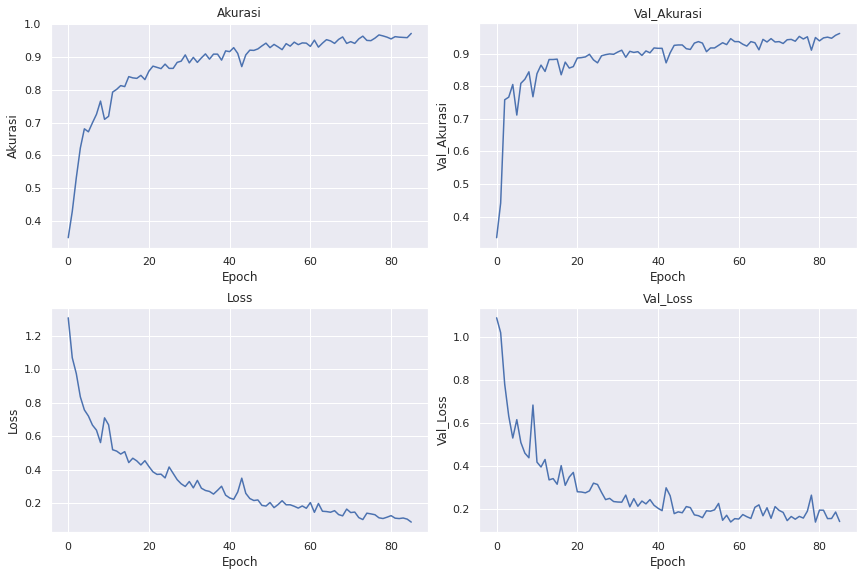

In [12]:
fig, ((ax1,ax2), (ax3,ax4)) = plt.subplots(2,2, figsize=(12,8))
ax1.plot(history.history["accuracy"])
ax1.set_title("Akurasi")
ax1.set_ylabel("Akurasi")
ax1.set_xlabel("Epoch")

ax2.plot(history.history["val_accuracy"])
ax2.set_title("Val_Akurasi")
ax2.set_ylabel("Val_Akurasi")
ax2.set_xlabel("Epoch")

ax3.plot(history.history["loss"])
ax3.set_title("Loss")
ax3.set_ylabel("Loss")
ax3.set_xlabel("Epoch")

ax4.plot(history.history["val_loss"])
ax4.set_title("Val_Loss")
ax4.set_ylabel("Val_Loss")
ax4.set_xlabel("Epoch")

fig.tight_layout(pad=0.6) # Mengatur title antar baris

In [4]:
uploaded = files.upload()

for fn in uploaded.keys():

  path = fn
  img = image.load_img(path, target_size=(150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x]) 
  klas = model.predict(images)
  klas = np.argmax(klas)
  print(fn)
  if klas == 0:
    print('Kertas')
  elif klas == 1:
    print('Batu')
  else:
    print("Gunting")
klas

NameError: name 'files' is not defined